# ŒëŒΩŒ¨ŒªœÖœÉŒ∑ œÉœÖŒΩŒ±ŒπœÉŒ∏Œ∑ŒºŒ¨œÑœâŒΩ

Œ§ŒµœáŒΩŒπŒ∫Œ≠œÇ ŒïŒæœåœÅœÖŒæŒ∑œÇ ŒîŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ, ŒïŒ∏ŒΩŒπŒ∫œåŒΩ Œ∫Œ±Œπ ŒöŒ±œÄŒøŒ¥ŒπœÉœÑœÅŒπŒ±Œ∫œåŒΩ Œ†Œ±ŒΩŒµœÄŒπœÉœÑŒÆŒºŒπŒøŒΩ ŒëŒ∏Œ∑ŒΩœéŒΩ 2021-22

A project of :
ŒìŒπŒ¨ŒΩŒΩŒ∑œÇ ŒîŒ¨œÅŒ±œÇ ( ŒëŒú: 1115201800040 )
and ŒöœâŒΩœÉœÑŒ±ŒΩœÑŒØŒΩŒøœÇ ŒöŒØœÑœÉŒøœÇ (ŒëŒú: 1115201900082)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sys

data='../content/drive/MyDrive/eclass_all_with_sentiment_v2.pkl'#edo bale to path pou exeis anabasei esy to diko sou pickle
df_original=pd.read_pickle(data)
df_original.shape


(228207, 17)

ŒïŒôŒ£ŒëŒìŒ©ŒìŒó-ŒîŒóŒúŒôŒüŒ°ŒìŒôŒë TSV ŒöŒïŒôŒúŒïŒùŒ©Œù

In [ ]:
#/content/drive/MyDrive/Œ§ŒïŒîŒï1/

# train and test.tsv

#len(df.index) = number of rows
train_len=int(0.8*len(df_original.index)) #this is 80% percent of df length

df_original.iloc[0:train_len,:].to_csv(r'./drive/MyDrive/TEDE1/train.tsv', sep='\t')

df_original.iloc[train_len:,:].to_csv(r'./drive/MyDrive/TEDE1/test.tsv', sep='\t')


ŒëŒ£ŒöŒóŒ£Œó 1 -CLEANUP

ŒëŒùŒ§ŒôŒúŒïŒ§Œ©Œ†ŒôŒ£Œó Nan Values (Œ∏Œ± Œ±œÄŒøŒ¥ŒµŒπœáŒ∏ŒµŒπ ŒøœÑŒπ Œ¥ŒµŒΩ œÖœÄŒ±œÅœáŒøœÖŒΩ œÉœÑŒ∑ŒΩ œÉœÑŒ∑ŒªŒ∑ 'text')

In [ ]:
df = df_original.copy(deep=True)


print(df.shape)
# Drop rows with empty text field.
df.dropna(subset=['text'], how='all', inplace=True)

df.shape

(228207, 17)


(228207, 17)

Œü Œ±œÅŒπŒ∏ŒºœåœÇ Œ≥œÅŒ±ŒºŒºœéŒΩ: œÄŒ±œÅŒ≠ŒºŒµŒπŒΩŒµ ŒØŒ¥ŒπŒøœÇ , Œ¨œÅŒ± Œ∫Œ¨Œ∏Œµ Œ≥œÅŒ±ŒºŒºŒÆ ŒµŒØœáŒµ not-null Œ∫ŒµŒØŒºŒµŒΩŒø œÉœÑŒ∑ŒΩ œÄŒµœÅŒπŒøœáŒÆ 'text'



ŒëœÜŒ±ŒØœÅŒµœÉŒ∑ special œÉœÖŒºŒ≤œåŒªœâŒΩ ,links ,emojis:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


#df = pd.read_pickle('eclass_all_with_sentiment_v2.pkl')


print('Number of rows and columns:', df.shape)
df1 = df['user_created']
df2 = df['date']


def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x


df= df.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) # links
df["text"]= df["text"].str.replace('[0,1,2,3,4,5,6,7,8,9]', '', case = False)
df = df.apply(remove_punctuation) #remove punctuation
df["text"]=df["text"].str.lower()   # lower case for texts
df["hashtags"]=df["hashtags"].str.lower()   # lower case for hashtags
df['user_created'] = df1
df['date'] = df2

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text without stopwords'] = df["text"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

df.head(40)

df.head(40) #quick check


Number of rows and columns: (228207, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.


id                                        user_name  \
0   1340539111971516416                                       Rachel Roh   
1   1338158543359250433                                      Albert Fong   
2   1337858199140118533                                              eli   
3   1337855739918835717                                    Charles Adler   
4   1337854064604966912                             Citizen News Channel   
5   1337852648389832708                                              Dee   
6   1337851215875608579                                Gunther Fehlinger   
7   1337850832256176136                               DrKrutika Kuppalli   
8   1337850023531347969                                      Erin Despas   
9   1337842295857623042                                      ChAmjad Ali   
10  1337841934170255365                                      Tamer Yazar   
11  1337840331522453507                                           VoiceM   
12  1337815730486702087                                             WION   
13  1337809196453081088                               DrKrutika Kuppalli   
14  1337807109010780162                                            Opoyi   
15  1337789467038523394                                          City AM   
16  1337789191598575616                                STOPCOMMONPASSORG   
17  1337783770070409218                                            ILKHA   
18  1337781178665816064                                  Braderz73GTTO     
19  1337776763384958976                                         Alex Vie   
20  1337774279862185986                                             Mani   
21  1337774059237629952                                 Richard Dunne MD   
22  1337773965595598848                                          City AM   
23  1337773751841144833                                        BOOM Live   
24  1337770798770081796                                  DOCNOS Official   
25  1337770118017900550                                  Devan Surendran   
26  1337769867676704770                                      Tamer Yazar   
27  1337769507402768384                                     Michael Finn   
28  1337765770420506625                                 Emiliano Pacelli   
29  1337761915087560707                         Dr KrakenElect Lipstick    
30  1337760271151063040                                      Andy Thomas   
31  1337758104847572999                                    Isabel Winnwa   
32  1337744008500703232                                        Contagion   
33  1337742598153383936                                 Rob of the Green   
34  1337742528108519424                                      Rajat Kotra   
35  1337739607857917954                        Shahjhan Malik  WearAMask   
36  1337735595704115200                                       John Berry   
37  1337734069816348673                                     Farooq Anees   
38  1337733927885303808                                         KHuntson   
39  1337733857349677059  Party politics isnt working for anyone anywhere   

                   user_location  \
0        La CrescentaMontrose CA   
1               San Francisco CA   
2                       Your Bed   
3           Vancouver BC  Canada   
4                            NaN   
5             Birmingham England   
6     Austria Ukraine and Kosovo   
7                            NaN   
8                            NaN   
9                      Islamabad   
10                  TurkeyIsrael   
11                           NaN   
12                         India   
13                           NaN   
14                           NaN   
15                London England   
16                        Global   
17                       T√ºrkiye   
18                    Bristol UK   
19                Los Angeles CA   
20                           NaN   
21                  Rochester NY   
22                London England   
23                  Mumbai India   
24 

In [ ]:
df["text"]= df["text"].str.replace('[0,1,2,3,4,5,6,7,8,9,!,~,\',\",@,#,$,%,^,&,*,(,),\-,_,+,=,{,},\[,\],\\,|,;,:,?,/,.,>,<]', '', case = False)
# |-> remove special symbols

def single(tweet):  # remove single letters , single letters don't add substance , only confusion
   new=' '.join( [w for w in tweet.split() if len(w)>1] ) # after the above clean-up for example "didn 't " becomes "didn t", "t" is useless in this case :)
   return new
df["text"]= df["text"].apply(single)

df["text"]= df["text"].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) # links
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) #emojis
df["text"]=df["text"].str.lower()   # lower case

print(df["text"].tail(20)) #quick check



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


228187    russias sputnikv vaccine has not been authoriz...
228188          apuwall who drtedros we need dates sputnikv
228189    tourists inoculated against covid with the rus...
228190    urban bengaluru covidvaccine availability for ...
228191    bbmp bengaluru covidvaccine availability for a...
228192    urban bengaluru covidvaccine availability for ...
228193    explore your locality like never before with l...
228194    urban bengaluru covidvaccine availability for ...
228195    israel delays entry of tourists vaccinated wit...
228196    antibodies to four covid vaccines differed in ...
228197    bbmp bengaluru covidvaccine availability for a...
228198    urban bengaluru covidvaccine availability for ...
228199    urban bengaluru covidvaccine availability for ...
228200    bbmp bengaluru covidvaccine availability for a...
228201    urban bengaluru covidvaccine availability for ...
228202    urban bengaluru covidvaccine availability for ...
228203    bbmp bengaluru covidvaccine av

ŒëœÜŒ±ŒØœÅŒµœÉŒ∑ stop-words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=stopwords.words('english')

other_words=['the','would','could'] #we can add any word that we believe is 'useless' for our data analysis , IDEAS: 'would','could',...
for word in other_words: stop.append(word)

print(stop)

def rem_stop(text,stop):
  tokenized=text.split() # permamently tokenize
  for i in stop:
    if i in tokenized:
       tokenized.remove(i)
  new=' '.join(tokenized) # make it string again
  return new

df['text']=df['text'].apply(lambda x: rem_stop(x,stop))
print(df['text'].tail())#quick check

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

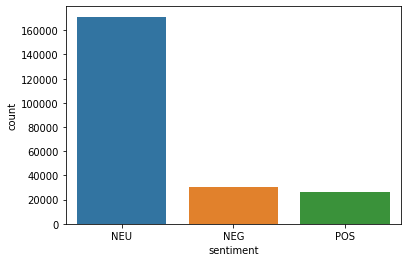

In [ ]:
#import numpy as np

# 2.1

import seaborn as sns

ax = sns.countplot(x="sentiment",data=df)

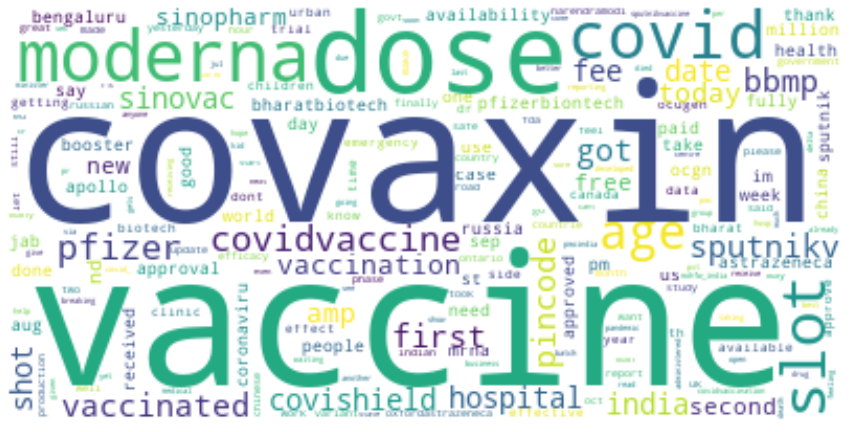

In [ ]:
#  2.2

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**2.3**

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyfiglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 865 kB 5.4 MB/s 


           .______     ______        _______.
           |   _  \   /  __  \      /       |
 ______    |  |_)  | |  |  |  |    |   (----`
|______|   |   ___/  |  |  |  |     \   \    
           |  |      |  `--'  | .----)   |   
           | _|       \______/  |_______/    
                                             

           __________________________________
          |__________________________________|






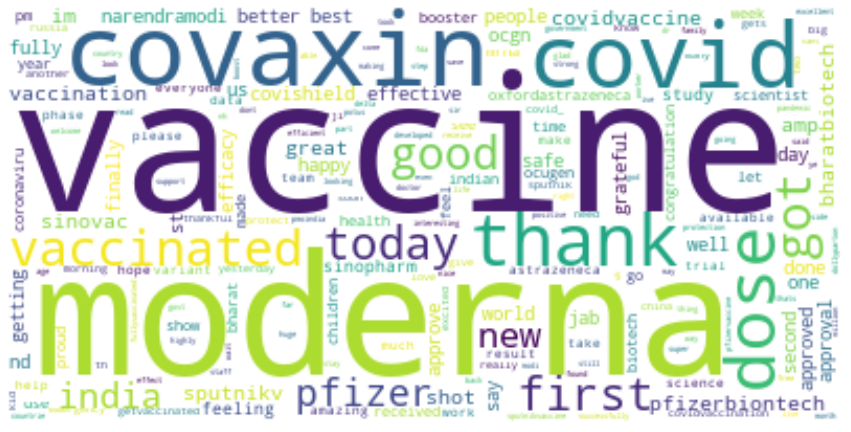











           .__   __.  _______   _______ 
           |  \ |  | |   ____| /  _____|
 ______    |   \|  | |  |__   |  |  __  
|______|   |  . `  | |   __|  |  | |_ | 
           |  |\   | |  |____ |  |__| | 
           |__| \__| |_______| \______| 
                                        

           _______________________________
          |_______________________________|






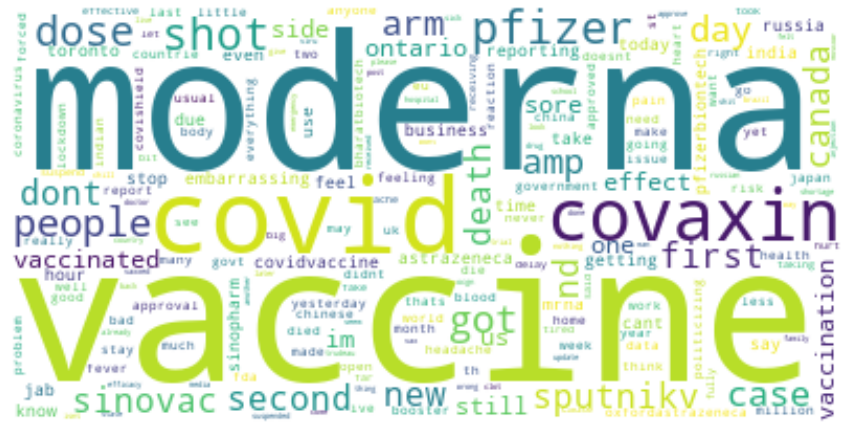











           .__   __.  _______  __    __  
           |  \ |  | |   ____||  |  |  | 
 ______    |   \|  | |  |__   |  |  |  | 
|______|   |  . `  | |   __|  |  |  |  | 
           |  |\   | |  |____ |  `--'  | 
           |__| \__| |_______| \______/  
                                         

           ________________________________
          |________________________________|






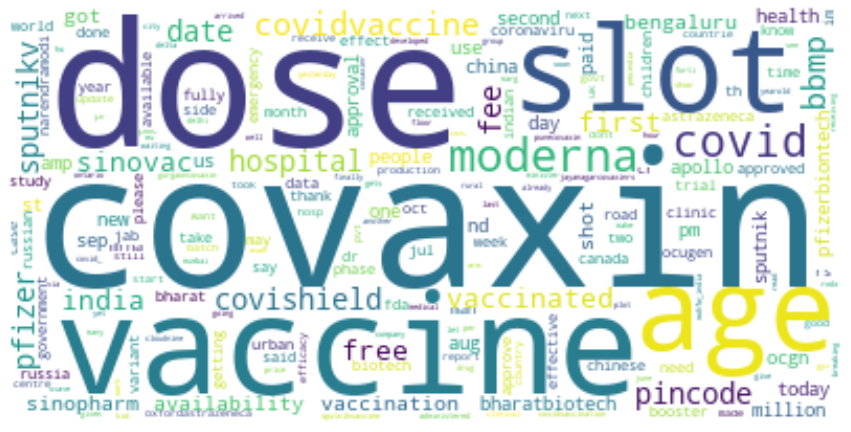

In [ ]:
import sys

from colorama import init
init(strip=not sys.stdout.isatty()) # strip colors if stdout is redirected
from termcolor import cprint
from pyfiglet import figlet_format



df4 = df.loc[df['sentiment'] == 'POS']
df4.head(40)


cprint(figlet_format('- POS', font='starwars'),'yellow', 'on_red', attrs=['bold'])
print("           __________________________________")
print("          |__________________________________|\n\n\n\n")
text = " ".join(i for i in df4.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


print("\n\n\n\n\n\n\n\n\n")
cprint(figlet_format('- NEG', font='starwars'),'yellow', 'on_red', attrs=['bold'])
print("           _______________________________")
print("          |_______________________________|\n\n\n\n")
df5 = df.loc[df['sentiment'] == 'NEG']
df5.head(40)

text = " ".join(i for i in df5.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


print("\n\n\n\n\n\n\n\n\n")
cprint(figlet_format('- NEU', font='starwars'),'yellow', 'on_red', attrs=['bold'])
print("           ________________________________")
print("          |________________________________|\n\n\n\n")
df6 = df.loc[df['sentiment'] == 'NEU']
df6.head(40)

text = " ".join(i for i in df6.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#2.4

contain_values = df[df['text'].str.contains("astrazeneca") == True]   #choose tweets which contain word astrazeneca and create dataframe "df7"
df7 = pd.DataFrame(contain_values)
df7


contain_values1 = df[df['text'].str.contains("moderna") == True]    #choose tweets which contain word moderna and pfiser or biontech and create dataframe "df9"
df8 = pd.DataFrame(contain_values1)
contain_values1 = df8[df8['text'].str.contains("pfizer","biontech") == True]
df9 = pd.DataFrame(contain_values1)
df9

id                user_name  \
2       1337858199140118533                      eli   
8       1337850023531347969              Erin Despas   
47      1340129728229871617         Vishwas Gaitonde   
78      1338572995992969217             Toni Kappesz   
96      1338546341404930050                 Human_90   
...                     ...                      ...   
226951  1461696236160012291               Kamal Vaid   
226957  1461691315037650946                  Spectre   
227160  1461502396568383490                  Tomasso   
227403  1461148676991168512                Neb Sivad   
227628  1460587758087389187  MyTicketsToIndia_Canada   

                       user_location  \
2                           Your Bed   
8                                NaN   
47                               NaN   
78                            BERLIN   
96                        Madchester   
...                              ...   
226951  Auf der Schwinge der Walk√ºre   
226957                           NaN   
227160                        London   
227403                       Chicago   
227628                           NaN   

                                         user_description  \
2                                             heil hydra    
8       Designingselling on Teespring Like 90s Disney ...   
47      A man of the quill  of the pill  Of pens  syri...   
78                                                    NaN   
96      Fighting For Freedom     \nIm not a Q left or ...   
...                                                   ...   
226951  IT and Business Consultant Tweets are personal...   
226957                              Lover of badass music   
227160                               Have an amazing day    
227403                                                NaN   
227628  We ensure hasslefree air travel bookings at th...   

               user_created  user_followers  user_friends  user_favourites  \
2       2020-06-25 23:30:28              10            88              155   
8       2009-10-30 17:53:54             887          1515             9639   
47      2012-09-30 20:00:54            1162           239             4514   
78      2009-06-08 12:38:48             221           483            58673   
96      2020-10-07 20:38:10             590           987             7609   
...                     ...             ...           ...              ...   
226951  2010-04-24 23:50:38            2340           204               43   
226957  2019-08-29 17:38:50               2            44               53   
227160  2021-06-04 21:37:43              20            83             1442   
227403  2009-03-05 17:49:14               1            10               81   
227628  2021-06-04 11:46:23              10            36               31   

        user_verified                 date  \
2               False  2020-12-12 20:33:45   
8               False  2020-12-12 20:01:16   
47              False  2020-12-19 03:00:00   
78              False  2020-12-14 19:54:06   
96              False  2020-12-14 18:08:11   
...               ...                  ...   
226951          False  2021-11-19 14:01:54   
226957          False  2021-11-19 13:42:21   
227160          False  2021-11-19 01:11:39   
227403          False  2021-11-18 01:46:06   
227628          False  2021-11-16 12:37:12   

                                                     text  \
2       coronavirus sputnikv astrazeneca pfizerbiontec...   
8       covid vaccine getting covidvaccine covid pfize...   
47      us fda approved two coronavirus vaccines pfize...   
78      warpspeed money go covid pioneers pfizerbionte...   
96      pandemic pcrgate condemic billgatesisnotadocto...   
...                                                   ...   
226951  us_fda efforts going back two companies pfizer...   
226957  covaxin ocugen amp bharatbiotech needed us can...   
227160  repthomasmassie covaxin vaccin approved fda ye...   
227403  whitehouse maybe covaxin avai

Text(0.5, 1.0, 'astra-zeneka')

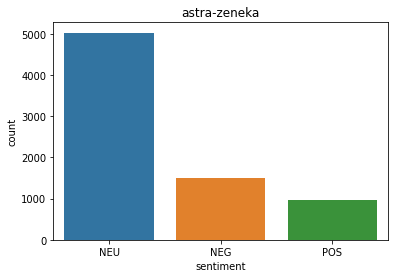

In [ ]:
ax1 = sns.countplot(x="sentiment",data=df7)
ax1.set_title('astra-zeneka')

Text(0.5, 1.0, 'moderna-pfizer')

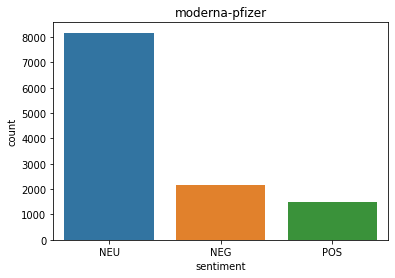

In [ ]:
ax2 = sns.countplot(x="sentiment",data=df9)
ax2.set_title('moderna-pfizer')

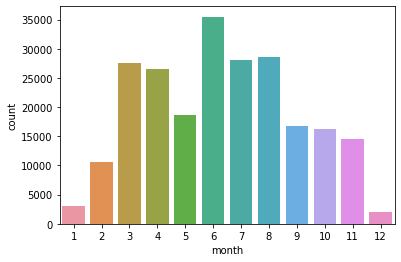

In [ ]:
#2.5

df['month'] = pd.DatetimeIndex(df['date']).month
df.head(50)
ax3 = sns.countplot(x="month",data=df)

**2.5-TOP5 ŒúŒóŒùŒïŒ£**  : Œ§Œ± œÄŒπŒø œÄŒøŒªŒªŒ± tweet ŒµŒπŒΩŒ±Œπ œÑŒøŒΩ **ŒôŒøœÖŒΩŒπŒø** ŒºŒµ 35500 œÄŒµœÅŒπœÄŒøœÖ tweet Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒøœÖŒΩ **ŒúŒ±œÅœÑŒπŒøœÇ,ŒëœÄœÅŒπŒªŒπŒøœÇ,ŒôŒøœçŒªŒπŒøœÇ Œ∫Œ±Œπ ŒëœçŒ≥ŒøœÖœÉœÑŒøœÇ**  (ŒøŒªŒøŒπ ŒºŒµ 26000-29000 tweet)

**2.5-Œ†ŒëŒ°ŒëŒ§ŒóŒ°ŒóŒ£ŒïŒôŒ£**

**ŒúŒ¨œÅœÑŒπŒøœÇ 2021: ŒàŒ≥Œ∫œÅŒπœÉŒ∑ johnson n johnson **
"On February 27, 2021, the Food and Drug Administration issued an Emergency Use Authorization (EUA) for the Janssen COVID-19 vaccine"


**ŒôŒøœçŒΩŒπŒøœÇ 2021: ŒúŒµœÑŒ¨ŒªŒªŒ±ŒæŒ∑ 'ŒîŒ≠ŒªœÑŒ±' ** , ŒµœÄŒπœÄŒªŒ≠ŒøŒΩ:"ŒïœÖœÅœâœÄŒ±ŒπŒ∫Œø Œ®Œ∑œÜŒπŒ±Œ∫Œø œÄŒπœÉœÑŒøœÄŒøŒπŒ∑œÑŒπŒ∫Œø ŒµŒºŒ≤ŒøŒªŒπŒ±œÉŒºŒøœç œÉŒµ ŒµœÜŒ±œÅŒºŒøŒ≥ŒÆ"


ŒÜŒªŒªŒ± Œ±œÄŒøœÉŒºŒ¨œÑŒ± Œ±œÄŒø ŒµŒπŒ¥Œ∑œÉŒµŒøŒ≥œÅŒ±œÜŒØŒ±:

"June 1, 2021
The Delta variant, first identified in India in late 2020, becomes the dominant variant in the U.S. "


July 30, 2021:"A MMWR notes a increase in breakthrough infections in Barnstable County, Massachusetts in July 2021"

August 30, 2021
ACIP recommends Pfizer-BioNTech‚Äôs vaccine for people ages 16 years and older


!!!!!!!!!!!!!!!!!!!!!!!!

ŒëŒ£ŒöŒóŒ£Œó 3

!!!!!!!!!!!!

**BAG OF WORDS**

In [ ]:
dfsub=df.head(10000)

In [ ]:
#BAG OF WORDS
import pickle
import operator
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus.reader.bnc import BNCWordView

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(dfsub['text'].tolist())
print(vectorizer.get_feature_names())
print(bow.toarray())

#PICKLE-STORING
#open a file, where you ant to store the data
file = open('bow-file', 'wb')

# dump information to that file
pickle.dump(bow, file)

# close the file
file.close()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['__ice', '_africanunion', '_b_meyer', '_emmalou', '_karlchua', '_loveliberty', '_robbiemoore', '_scgp_', '_snowbunting', '_theenquirer', '_thenmh', '_what', 'a__alimov', 'aacommunities', 'aafp', 'aampa', 'aampe', 'aap', 'aathans', 'aayega', 'aayog', 'ab', 'ab_peds', 'aballinga', 'abbastermezi', 'abbiesbrooks', 'abbvie', 'abc', 'abcnews', 'abcworldnews', 'abdallahdaar', 'abdullah', 'aberfeldy', 'ability', 'abilo', 'abingtonparkmedicalcentre', 'able', 'abline', 'abo', 'aborted', 'abou', 'about', 'abouteua', 'abouthungary', 'abpoli', 'abroad', 'abs', 'abscbnnews', 'absence', 'absolute', 'absolutely', 'abstaining', 'abt', 'abudhabi', 'abudhabilife', 'abundance', 'abus', 'abuse', 'ac', 'academic', 'academics', 'acc', 'accelerating', 'acceleration', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessibility', 'accessible', 'accident', 'accidental', 'accidentally', 'accommodating', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordi', 'according'

**TF-IDF:**


ŒïŒ¥œé ŒµŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ œÑŒ± idf_weights œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ∫Œ±œÑŒ¨ Œ±œçŒæŒøœÖœÉŒ± œÉŒµŒπœÅŒ¨


!!!!!! Œ†œÅŒøœÉŒøœáŒÆ œÑŒø tf-idf ŒºŒøŒΩœÑŒ≠ŒªŒø œÄŒøœÖ Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ Œ∫Œ±Œπ œÉœÑŒ∑ 4 ŒµŒπŒΩŒ±Œπ œÄŒπŒø Œ∫Œ¨œÑœâ

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#import CountVectorizer


#instantiate CountVectorizer()
cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(dfsub['text without stopwords'])

word_count_vector.shape

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
# sort ascending
df_idf.sort_values(by=['idf_weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


idf_weights
vaccine              1.926946
pfizerbiontech       2.168062
covid                2.321356
moderna              3.063668
first                3.343507
...                       ...
indiafightscovid     9.517293
indiahottopics       9.517293
indiainpakistan      9.517293
indiana              9.517293
ùó™ùóúùóßùóõ                 9.517293

[15375 rows x 1 columns]

ŒïŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ œÑŒ∑ŒΩ œÑŒπŒºŒÆ tf-idf
(œÑŒø œÑŒµŒªŒπŒ∫Œø ŒºŒøŒΩœÑŒµŒªŒø ŒµŒπŒΩŒ±Œπ œÉœÑŒø ŒµœÄŒøŒºŒµŒΩŒø Œ∫ŒøŒºŒºŒ±œÑŒπ)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#import CountVectorizer
# this is a very toy example, do not try this at home unless you want to understand the usage differences


# count matrix
count_vector=cv.transform(dfsub['text without stopwords'])
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)   # ŒºŒøŒΩŒø Œ≥ŒπŒ± ŒµŒ∫œÑœçœÄœâœÉŒ∑ Œ±œÄŒøœÑŒµ

feature_names = cv.get_feature_names()
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
#print the scores
dfs = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
dfs.sort_values(by=["tfidf"],ascending=False)

#dfs.head(40)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


tfidf
cytokine     0.408029
daikon       0.408029
paste        0.408029
storm        0.390646
treat        0.354320
...               ...
fraud        0.000000
fraudnation  0.000000
frauds       0.000000
fraught      0.000000
ùó™ùóúùóßùóõ         0.000000

[15375 rows x 1 columns]

TF-IDF ŒºŒøŒΩœÑŒ≠ŒªŒø œÄŒøœÖ Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œÉœÑŒ∑ 4

In [ ]:
#TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000,
stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(dfsub['text'].tolist())
print( tfidf.shape) #the output is a numpy array of features
print(tfidf.toarray())

#PICKLE-STORE
file = open('tf-file', 'wb')
pickle.dump(tfidf, file)
file.close()

(10000, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**WORD 2 VEC**

In [ ]:
#WORD2VEC

tokenized_tweets = list(dfsub['text'].apply(lambda x: x.split())) # tokenizing
import gensim

model_w2v = gensim.models.Word2Vec(
 tokenized_tweets,
 size=200, # desired no. of features/independent variables
 window=5, # context window size
 min_count=1,
 sg = 1, # 1 for skip-gram model
 hs = 0,
 negative = 10, # for negative sampling
 workers= 2, # no.of cores
 seed = 34)
model_w2v.train(tokenized_tweets, total_examples= len(df1), epochs=20)
print(len(model_w2v.wv.vocab))






15495


In [ ]:
# w2v_for_tweets

averages=[]
for i in range(0,len(tokenized_tweets)): # gia kathe tweet
  sum=[]
  for word in tokenized_tweets[i]:     # gia kathe leksi sto tweet
    if len(sum)==0:    #( sthn arxh kanoyme initialize to sum me to array dianysmaton ths proths leksis   )
      sum= model_w2v.wv[word]
    else:
      sum=np.add(sum,model_w2v.wv[word])  # prosthese ta dianysmata ths lekksis sto sum
    #print(sum)
  averages.append(sum/len(tokenized_tweets[i]))   # bres average ton dianosmaton kanontas average=sum/len(tweet)

print(averages[0]) # this is the array for the first tweet

#PICKLE-STORE
file = open('w2v-file', 'wb')
pickle.dump(averages, file)
file.close()



[ 0.13953196  0.15410738 -0.00736455 -0.04505376  0.05298601  0.10122198
  0.17556301  0.04023663 -0.22334515 -0.14167204 -0.13031182 -0.22659983
  0.12352064  0.05026874  0.02075092  0.19178268  0.09547691  0.10265326
 -0.01927928 -0.03941066  0.05515851 -0.07920571  0.23694634 -0.04269372
 -0.25193745 -0.02091379  0.04538944 -0.24851452  0.29013482 -0.05735802
  0.08697861 -0.00965362 -0.00057387  0.06680527 -0.02638607 -0.06854348
  0.17486861 -0.14347084 -0.16761568  0.18312453 -0.06542881  0.01326342
 -0.14759867 -0.17463598 -0.02240205 -0.17008878  0.15689191 -0.0369671
  0.05642551 -0.00089974 -0.18997265 -0.02500713 -0.09398624  0.17055562
 -0.02130828  0.19006075 -0.02554066 -0.08018336  0.1528397   0.24004772
  0.05676398  0.12447391 -0.20134546  0.09205249  0.228955   -0.02387415
 -0.0394324  -0.06184496  0.04273985  0.04017391 -0.00891718  0.08291456
  0.09463692  0.02056145 -0.17942339  0.06600728  0.14780177  0.08809258
 -0.10158046  0.11692441  0.01310234 -0.00466536  0.

ŒüŒ§ŒëŒù ŒòŒë ŒöŒëŒùŒüŒ•ŒúŒï LOAD Œ§Œü w2v-file Œ∏Œë Œ§ŒüŒ• ŒîŒ©Œ£ŒüŒ•ŒúŒï Œ§Œü ŒüŒùŒüŒúŒë w2v-data
(ŒòŒë ŒïŒôŒùŒëŒô TO AVERAGES-ARRAY(LIST-OF-LISTS) Œ†ŒüŒ• Œ¶Œ§ŒôŒëŒûŒëŒúŒï Œ†ŒôŒü Œ†ŒëŒùŒ©)

To w2v-data Œ∏Œ± ŒµŒπŒΩŒ±Œπ œÑŒ± DATA Œ∫Œ±Œπ Œ∑ œÉœÑŒ∑ŒªŒ∑ sentiment(ŒøœÄœâœÇ œÉŒµ Œ∫Œ±Œ∏Œµ œÄŒµœÅŒπœÄœÑœâœÉŒ∑) œÑŒø TARGET

!!!!!!!!!!!!!!!!!!!!!!!!

ŒëŒ£ŒöŒóŒ£Œó 4

!!!!!!!!!!!!

In [ ]:
# LOAD BOW , TF-IDF  AND W2V DATA

file = open('bow-file', 'rb')
bow1 = pickle.load(file)
file.close()
bow_data=bow1.toarray()
target=list(dfsub['sentiment'])
print('target')
print(target)

file = open('tf-file', 'rb')
tf = pickle.load(file)
file.close()
tf_data=tf.toarray()
#target=list(df1['sentiment'])  , SAME TARGET


#LOAD-TEST
file = open('w2v-file', 'rb')
w2v_data = pickle.load(file)
#target=list(df1['sentiment'])  , SAME TARGET
file.close()


target
['NEU', 'NEG', 'NEU', 'NEU', 'NEG', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEG', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEG', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEG', 'NEU', 'NEU', 'NEU', 'NEG', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEU', 'NEU', 'NEU', 'POS', 'NEG', 'NEU', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'POS', 'NEU', 'POS', 'NEU', 'POS', 'NEG', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'POS', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEG', 'NEU', 'NEG', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'POS', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEU', 'NEU', 'POS', 'NEU', 'NEU'

In [ ]:
#LIBRARIES-SKLEARN
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [ ]:
#DEFINE TEST N TRAIN DATA

x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,target,test_size=0.2,random_state=209)  # bow   ,yes x_train means x_train_bow
####################################
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(tf_data,target,test_size=0.2,random_state=209) # tf
x_train_w2v,x_test_w2v,y_train_w2v,y_test_w2v=train_test_split(w2v_data,target,test_size=0.2,random_state=209) #w2v

# remember target=list(df1['sentiment'])


In [ ]:
# 10 cross validation

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_metrics(model,data,target): # in place of model we can have SVN/RF/KNN-model
  print('precision ',cross_val_score(model,data,target, cv=10, scoring='precision_weighted'))
  print('recall ', cross_val_score(model,data,target, cv=10, scoring='recall_weighted'))
  print('F1',cross_val_score(model,data,target, cv=10, scoring='f1_weighted'))
  print('ACCURACY',cross_val_score(model,data,target, cv=10, scoring='accuracy') )


**Œ∑ 4 œÉŒµ Œ±œÖœÑŒø œÑŒø œÉŒ∑ŒºŒµŒØŒø**: Œ≠œáŒøœÖŒºŒµ Œ∫Œ±Œ∏ŒøœÅŒØœÉŒµŒπ Œ≥ŒπŒ± œÑŒ± bow,tf Œ∫Œ±Œπ w2v œÄŒøŒπŒ± Œ∏Œ± ŒµŒØŒΩŒ±Œπ œÑŒ± xtrain,ytrain,xtest Œ∫Œ±Œπ ytest Œ¥ŒµŒ¥ŒøŒºŒµŒΩŒ± , ŒµœÄŒØœÉŒ∑œÇ œÄŒ±ŒΩœâ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆœÉŒ±ŒºŒµ œÑŒ∑ŒΩ print_metrics ŒøœÄŒøœÖ ŒºŒµ 10 cross validatio Œ±ŒæŒπŒøŒªŒøŒ≥ŒÆœÉŒøœÖŒºŒµ œÑŒøœÖœÇ classifier

4-classifiers:

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# SVM -BOW

#CREATE CLASSIFIER FOR BOW
#Create a svm Classifier
clf_bow = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_bow.fit(x_train_bow, y_train_bow)

#Predict the response for test dataset
y_pred_bow = clf_bow.predict(x_test_bow)

print('BOW')
print('SVM')
print_metrics(clf_bow,bow_data,target)





BOW
SVM


In [ ]:
##   RANDOM FORESTS -BOW

RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train_bow,y_train_bow)
# predict the labels on validation dataset
predictions_RF=RF.predict(x_test_bow)
# Use accuracy_score function to get the accuracy

print('BOW')
print('RF')
print_metrics(RF,bow_data,target)# this is 10 fold

###  KNN - BOW

## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(x_train_bow,y_train_bow)
## See how the model performs on the test data.
predictions_KNN= knn.predict(x_test_bow)
#knn.score(X_test, y_test)

print('BOW')
print('KNN')
print_metrics(knn,bow_data,target)


Œ•œÄŒµŒΩŒ∏œçŒºŒπœÉŒ∑ : œÑŒø sample(df1) œÄŒµœÅŒπŒµœáŒµŒπ 1500 Œ≥œÅŒ±ŒºŒºŒµœÇ

In [ ]:
# SVM -  TF-IDF
clf_tf = svm.SVC(kernel='linear') # Linear Kernel
clf_tf.fit(x_train_tf, y_train_tf)
y_pred_tf = clf_tf.predict(x_test_tf)

print('TF-IDF')
print('SVM')
print_metrics(clf_tf,tf_data,target)

##   RF -TFIDF

RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train_tf,y_train_tf)
# predict the labels on validation dataset
predictions_RF=RF.predict(x_test_tf)
# Use accuracy_score function to get the accuracy

print('Tfidf')
print('RF')
print_metrics(RF,tf_data,target)# this is 10 fold

###  KNN - TFIDF

## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(x_train_tf,y_train_tf)
## See how the model performs on the test data.
predictions_KNN= knn.predict(x_test_tf)
#knn.score(X_test, y_test)

print('Tfidf')
print('KNN')
print_metrics(knn,tf_data,target)

In [ ]:

###  SVM - W2V

clf_w2v = svm.SVC(kernel='linear') # Linear Kernel
clf_w2v.fit(x_train_w2v, y_train_w2v)
y_pred_w2v = clf_w2v.predict(x_test_w2v)

print('W2V')
print('SVM')
print_metrics(clf_w2v,w2v_data,target)

###  RF - W2V
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train_w2v,y_train_w2v)
# predict the labels on validation dataset
predictions_RF=RF.predict(x_test_w2v)
# Use accuracy_score function to get the accuracy

print('W2V')
print('RF')
print_metrics(RF,w2v_data,target)# this is 10 fold

###  KNN - W2V

## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(x_train_w2v,y_train_w2v)
## See how the model performs on the test data.
predictions_KNN= knn.predict(x_test_w2v)
#knn.score(X_test, y_test)

print('W2V')
print('KNN')
print_metrics(knn,w2v_data,target)

Œ†ŒëŒ°ŒëŒ§ŒóŒ°ŒóŒ£ŒïŒôŒ£:

1) ŒöŒëŒöŒü Œ§Œü W2V ŒúŒï SVM (œÄŒ±ŒΩœÑŒ± ŒºŒπŒªœåŒΩœÑŒ±œÇ Œ≥ŒπŒ± œÑŒø sample 1500 tweet)
2) Œ§Œü KNN Œ≠Œ≤Œ≥Œ±Œ∂Œµ œÑŒ∑ œáŒµŒπœÅœåœÑŒµœÅŒ∑ Œ±œÄœåŒ¥ŒøœÉŒ∑ (ŒºŒ±Œ∂ŒØ ŒºŒµ svm œÉŒµ w2v)
3) TO TFIDF ŒóŒ§ŒëŒù ŒöŒüŒùŒ§Œë Œ£Œ§ŒóŒù ŒëŒ†ŒüŒîŒüŒ£Œó(SE SVM KAI RF ŒöŒëŒô Œ§Œë ŒîŒ•Œü Œ£Œ•ŒùŒóŒòŒ©Œ£       0.7-0.8)  ŒöŒëŒô Œ£Œï ŒõŒôŒìŒë ŒïŒùŒîŒïŒßŒüŒúŒïŒùŒë ŒóŒ§ŒëŒù ŒöŒëŒô ŒßŒïŒôŒ°ŒüŒ§ŒïŒ°Œü ŒëŒ†Œü Œ§Œü BAG OF WORDS , Œ•Œ†ŒüŒ®ŒôŒëŒñŒüŒúŒëŒ£Œ§Œï ŒüŒ§Œô Œ†Œ°ŒüŒ¶ŒëŒùŒ©Œ£ Œ¶Œ§ŒëŒôŒïŒô Œü ŒëŒ°ŒôŒòŒúŒüŒ£ SAMPLE  
4) TF-IDF BOW ŒïŒôŒßŒëŒù ŒöŒüŒôŒùŒó Œ£Œ•ŒúŒ†ŒïŒ°ŒôŒ¶ŒüŒ°Œë, Œ£Œï ŒëŒùŒ§ŒôŒòŒïŒ£Œó ŒúŒï W2V  .  ŒõŒüŒìŒôŒöŒü Œ¶Œ•Œ£ŒôŒöŒë ŒëŒ¶ŒüŒ•  ŒïŒö Œ¶Œ•Œ£ŒïŒ©Œ£ ŒïŒôŒùŒëŒô Œ†ŒëŒ°ŒüŒúŒüŒôŒïŒ£ ŒúŒïŒòŒüŒîŒüŒô

Œ§ŒïŒõŒüŒ£ 4

ŒëŒ£ŒöŒóŒ£Œó 5

In [ ]:
#tokenizing
tokenized=df1['text'].apply(lambda x: x.split())
print(tokenized)

#stop words(-already done)
def stopw(tokens): # already done
  filtered_words = [word for word in tokens if word not in stopwords.words('english')]
  return filtered_words

tokenized=tokenized.apply(stopw)
print(tokenized)


ŒàœáŒøœÖŒºŒµ ŒÆŒ¥Œ∑ Œ∫Œ¨ŒΩŒµŒπ stopwords removal , Œ≥ŒπŒ± Œ±œÖœÑŒø Œ∑ def stopw Œ¥ŒµŒΩ Œ±ŒªŒªŒ±ŒæŒµ Œ∫Œ±œÑŒπ

In [ ]:
# Lemmatization AND STEMMING
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

for tweet in tokenized:
  i=0
  for word in tweet:
    #lemmatizer.lemmatize(word)
    rootWord=PorterStemmer().stem(lemmatizer.lemmatize(word))
    tweet[i]=rootWord
    i=i+1

print(tokenized[0:10]) #small test


In [ ]:
# BAG-OF-WORDS AND DICTIONARY
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(tokenized)

print(type(id2word))
print(id2word)

# Create Corpus
#texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(word) for word in tokenized]
print(type(corpus))
print(corpus)

In [ ]:
#LDA - THE MODEL
#import gensim #-> in ASKISI3-w2v

#     FOR NUM_OF_TOPICS=10
lda_model=gensim.models.LdaModel(corpus=corpus,num_topics=10,id2word=id2word)

In [ ]:
lda_model.print_topics()

In [ ]:
#TOPIC COHERENCE FOR K = 10 topics

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#FIND THE APPROPRIATE AMOUNT OF TOPICS

# coherense score for different number of topics  - function
def coherence_score(corpus, k, dictionary , words):#k=number of topics
   lda_model=gensim.models.LdaModel(corpus=corpus,num_topics=k,id2word=dictionary)#lda_model
   coherence_model_lda = CoherenceModel(model=lda_model, texts=words, dictionary=dictionary, coherence='c_v')
   return coherence_model_lda.get_coherence()

#print(coherence_score(corpus,10,id2word,tokenized))


scores=[]
start=2
end=61
for i in range(start,end):   # !!!!!!!!!    Œ†œÅŒøœÉŒøœáŒ∑ : Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ 2 ŒµœâœÇ 60 topics
  scores.append(coherence_score(corpus, i ,id2word,tokenized))


print(scores)


ŒëŒöŒüŒúŒë Œ∫Œ±Œπ œÉœÑŒ± 50 topics ŒµŒπŒΩŒ±Œπ Œ∫Œ±ŒªŒø œÑŒø œÉŒ∫ŒøœÅ œÄŒøœÖ œÉŒ∑ŒºŒ±ŒπŒΩŒµŒπ ŒøœÑŒπ Œ¥ŒµŒΩ ŒºœÄŒøœÅŒøœÖŒºŒµ ŒΩŒ± œÖœÄŒøŒ∏ŒµœÉŒøœÖŒºŒµ ŒøœÑŒπ Œø ŒπŒ¥Œ±ŒΩŒπŒ∫ŒøœÇ Œ±œÅŒπŒ∏ŒºŒøœÇ ŒµŒπŒΩŒ±Œπ Œ±œÄŒø 2 ŒµœâœÇ 60 , Œ±ŒªŒªŒ± œÄœÅŒøœÜŒ±ŒΩœâœÇ ŒºœÄŒøœÅŒøœÖŒºŒµ ŒΩŒ± Œ≤œÅŒøœÖŒºŒµ œÑŒøŒΩ Œ∫Œ±ŒªœÖœÑŒµœÅŒø Œ±ŒΩŒ±ŒºŒµœÉŒ± œÉœÑŒø ŒµœÖœÅŒøœÇ (2,60)

In [ ]:
# GRAPH COHERENCE/ NUM_OF_TOPIC

print(max(scores))
print('appropriate num between %s and %s is %s'%(start,end-1,scores.index(max(scores))+ 2))  # +2 giati ta index [0:58] antistoixoun se [2:60]

num_of_topics=scores.index(max(scores))+ 2

import matplotlib.pyplot as plt
# now scores is a list of topic-coherences for topic from 2 to 50

# x axis values
x = list(range(start,end))  # =range(2,50)
# corresponding y axis values
y = scores

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Number Of Topics')
# naming the y axis
plt.ylabel('Coherence Score')

# giving a title to my graph
plt.title('Coherenception')

# function to show the plot
plt.show()

plt.savefig('answer5-cohernce.png')


In [ ]:
#LDA - MODEL  - FOR BEST COHERENCE SCORE
#     FOR NUM_OF_TOPICS=46
lda_model2=gensim.models.LdaModel(corpus=corpus,num_topics=num_of_topics,id2word=id2word)

In [ ]:
#pyLDAvis

!pip install pyLDAvis==3.2.1

In [ ]:
import pyLDAvis

#import pyLDAvis.gensim_models
#import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(lda_model, corpus, id2word) # this is for topics =10
#pyLDAvis.sklearn.prepare(lda_model,vocab=id2word,corpus)

In [ ]:
pyLDAvis.gensim.prepare(lda_model2, corpus, id2word) # this is for topics = num_of_topics

Œ§Œø pyLDAvis œÉœÑŒ∑ŒΩ Œ±œÅœáŒ∑ ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒøœÖœÉŒµ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫Œ± ŒøœÑŒ±ŒΩ œÑŒø ŒæŒ±ŒΩŒ±œÑœÅŒµŒæŒ±ŒºŒµ Œ±œÄŒø ŒºŒøŒΩŒø œÑŒøœÖ ŒµŒπœáŒµ Œ∏ŒµŒºŒ±

Œ¥ŒøŒ∫ŒπŒºŒ±œÉŒ±ŒºŒµ œÄŒ±ŒªŒπŒ± ŒµŒ∫Œ¥ŒøœáŒ∑ Œ±ŒªŒªŒ± Œ±œÄŒªŒ± ŒµŒ∫œÑœÖœÄœâŒΩŒµŒπ œÉœÑŒøŒπœáŒµŒπŒ±

**œÄŒ±œÅŒ±œÑŒ∑œÅŒ∑œÉŒ∑** ŒøœÑŒ±ŒΩ ŒµŒπœáŒµ ŒªŒµŒπœÑŒøœÖœÅŒ≥Œ∑œÉŒµŒπ Œ≥ŒπŒ± k=10 œÄŒµœÅŒπœÄŒøœÖ 7 Œ±œÄŒø œÑŒ± 10 topics ŒÆœÑŒ±ŒΩ œÉœáŒµŒ¥œåŒΩ œÑŒø Œ≠ŒΩŒ± œÄŒ¨ŒΩœâ œÉœÑŒø Œ¨ŒªŒªŒø Œ∫Œ±Œπ œÉœáŒµŒ¥ŒøŒΩ œåŒªŒ± ŒµŒØœáŒ±ŒΩ œÑŒøœÄ2 ŒªŒ≠ŒæŒµŒπœÇ œÑŒπœÇ 'vaccination' Œ∫Œ±Œπ 'pfizerbiontech' (Œ∫Œ±Œπ ŒªŒØŒ≥Œ± ŒµŒØœáŒ±ŒΩ œÑŒ∑ 'covid') . Œ£œÖŒΩŒµœÄœéœÇ , œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ œÉœÑŒø Œ±ŒΩŒ∏œÅœéœÄŒπŒΩŒø ŒºŒ¨œÑŒπ Œ¥ŒµŒΩ œÖœÄŒÆœÅœáŒµ œÄŒøŒπŒ∫ŒπŒªŒØŒ± Œ∏ŒµŒºŒ¨œÑœâŒΩ (ŒØœÉœâœÇ Œ±œÄŒªŒ± Œ≥ŒπŒ±œÑŒØ œåŒΩœÑœâœÇ ŒøŒªŒ± œÑŒ± tweet ŒµŒØœáŒ±ŒΩ Œ∏ŒµŒºŒ± œÑŒøŒΩ covid Œ∫Œ±Œπ œÑŒøŒΩ ŒµŒºŒ≤ŒøŒªŒπŒ±œÉŒºœå )

Œ§ŒïŒõŒüŒ£ 5




Œ§ŒïŒõŒüŒ£ !    